In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots 
import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
#from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

SyntaxError: invalid syntax (<ipython-input-31-a870bb9db346>, line 4)

In [12]:
ML_data = url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv", )
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [13]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [14]:
# checking if there are missing values in the datset

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [15]:
# descriptive summary of the data

df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [16]:
print(f'The number of rows is the dataset is {df.shape[0]} \nThe number of columns in the dataset is {df.shape[1]}')

The number of rows is the dataset is 19735 
The number of columns in the dataset is 29


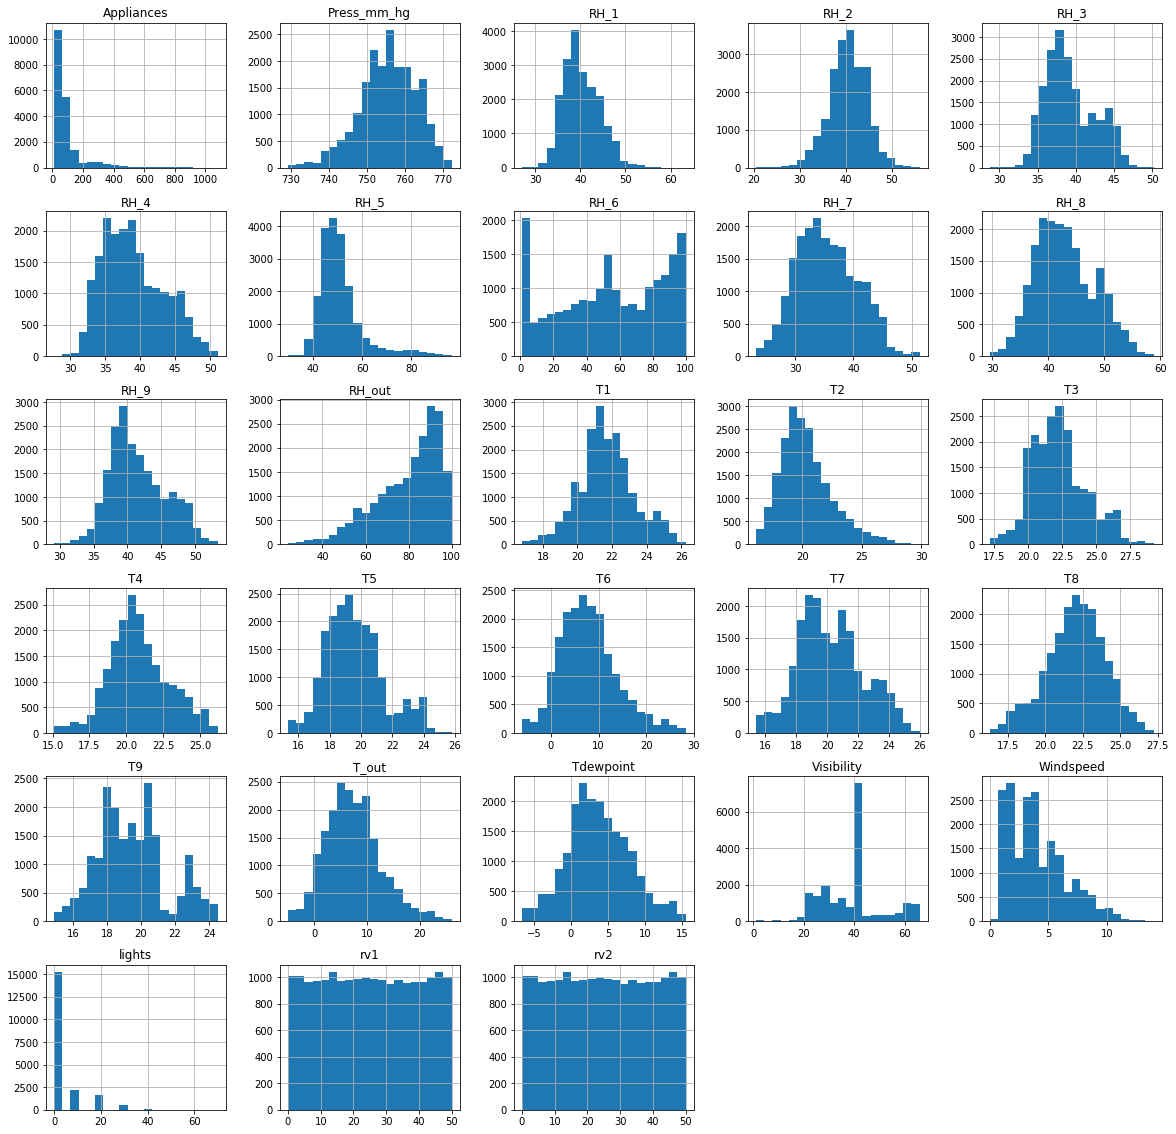

In [17]:
# lets visualize the histogram of all the features to understand the  distribution

df.hist(bins=20, figsize=(20,20));

In [ ]:
# dropping the lights column
df.drop(['lights'], axis=1,inplace=True)

# dropping the date column since its not a time series problem
df.drop(['date'], axis=1, inplace=True)

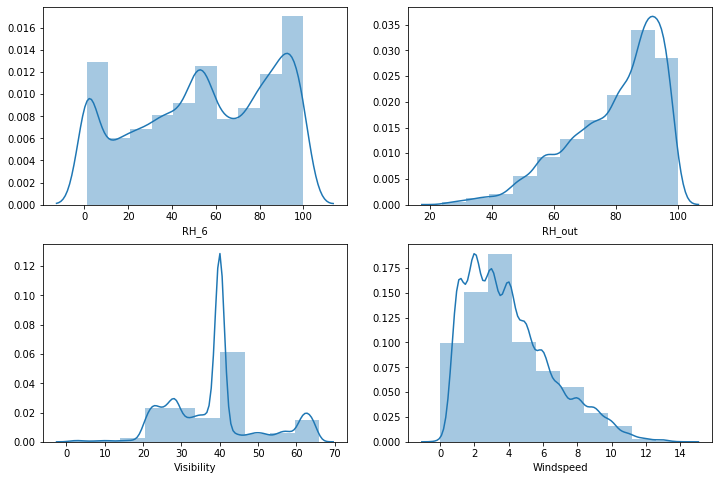

In [18]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution

fig, ax = plt.subplots(2,2,figsize=(12,8))
ax1 = sns.distplot(df["RH_6"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
ax4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

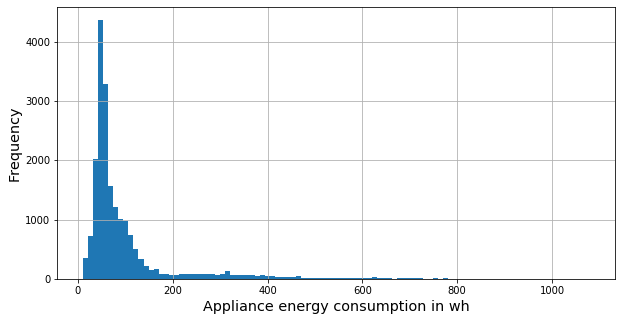

In [19]:
# lets take a closer look at the appliance column

df['Appliances'].hist(bins = 100, figsize=(10,5))
plt.xlabel('Appliance energy consumption in wh', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large');


In [20]:
# calculating the percentage of appliance enegry consumption less than 200 wh

print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((df[df['Appliances'] <= 200]['Appliances'].count()) / len(df['Appliances']) * 100, 2)}%")

 Percentage of the appliance energy consumption less than 200 Wh is: 90.29%


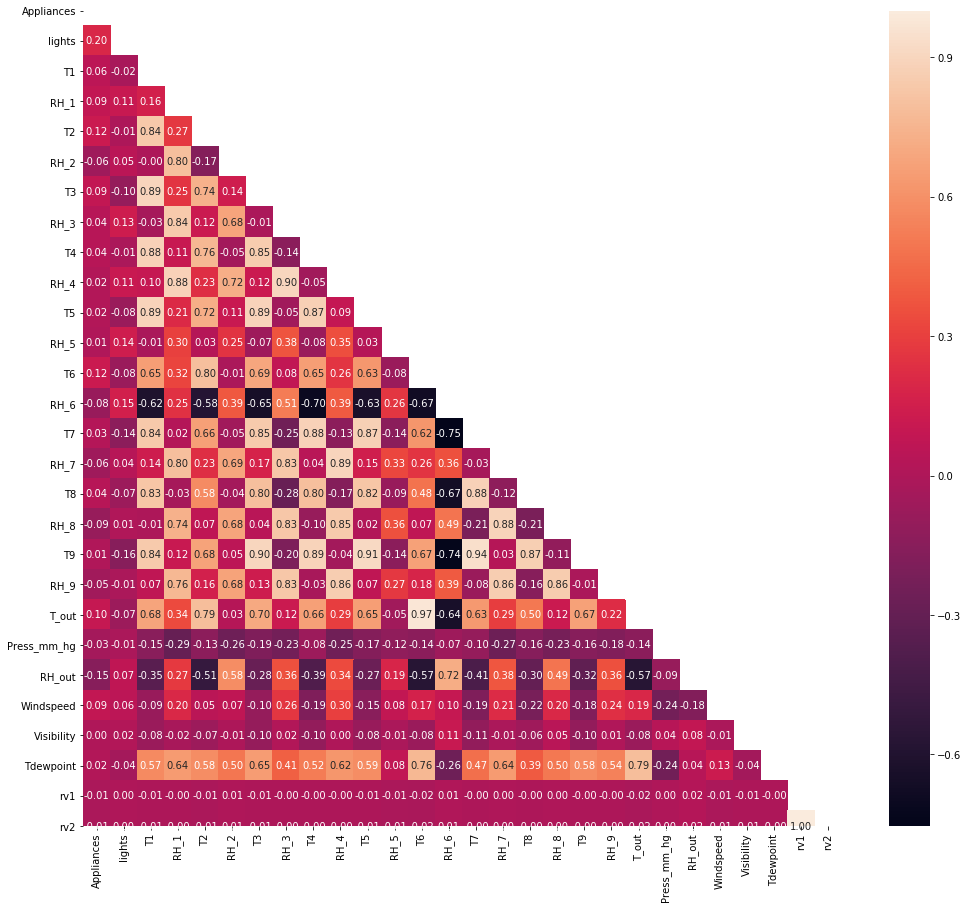

In [21]:
# Use the weather , temperature , applainces and random column to see the correlation

corr = df.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
fig = plt.figure(figsize=(17, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask);

In [23]:
# lets see how each features correlates with the target column
cor_matrix = df.corr()
cor_matrix['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

In [24]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cross_validation  import train_test_split

In [42]:
from sklearn.model_selection import train_test_split

y = df.pop('output')

X = df

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
X.iloc[X_train] # return dataframe train

NameError: name 'df' is not defined

In [36]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

NameError: name 'features' is not defined

In [28]:
print(f'shape of train set is {X_train.shape}')
print(f'shape of test set is {X_test.shape}')

NameError: name 'X_train' is not defined

In [ ]:
# importing the required algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [11]:
# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(models, X_train, X_test, y_train, y_test)

SyntaxError: invalid syntax (<ipython-input-11-253e1317175e>, line 3)

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# define the param grid
def param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [10, 50, 100, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(reg, param_grid, cv = 6, n_jobs = -1 , scoring='r2' , verbose=2)

# fit the gridserch model
grid_search.fit(X_train, y_train)

NameError: name 'ExtraTreesRegressor' is not defined

In [38]:
# check for the best param fot the ExtraTreeReggressor

print(f'best param of the ExtraTreeRegressor is: {grid_search.best_params_}')

NameError: name 'grid_search' is not defined

In [39]:
# Best possible estimator for ExtraTreesRegressor

best_model = grid_search.best_estimator_

print(f'print R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

NameError: name 'grid_search' is not defined

In [40]:
# intantiate the grid params
param_grid = [
 {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10],
  'max_depth':[10, 15]},
 {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
 ]

# instantiate the random forest regressor
forest_reg = RandomForestRegressor()

# instanntiate the grid serch
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring='r2')

# fit the grid serchon training data
grid_search.fit(X_train, y_train)

NameError: name 'RandomForestRegressor' is not defined

In [41]:
# get best params
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [42]:
# get best model
model = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [43]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

NameError: name 'grid_search' is not defined

In [44]:
# Get top 10 most important feature 
names[0:10]

NameError: name 'names' is not defined

In [31]:
df = df.drop(['lights'], axis=1, inplace=True)

# dropping the date column as instructed

df = df.drop(['date'], axis=1, inplace=True)

NameError: name 'df' is not defined